In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

file_path = '/Users/miked/Documents/Travel_Tide_Project/TravelTideUpdated.csv'

data = pd.read_csv(file_path)

data.head()

,user_id,age,gender,married,has_children,total_sessions,total_page_clicks,avg_page_clicks_per_session,mean_session_time,total_flights_booked,total_hotels_booked,total_cancellations,avg_flight_discount,avg_hotel_discount,total_checked_bags,percentage_flights_with_checked_bags,avg_base_fare_usd,avg_hotel_per_room_usd,scaled_average_dollar_saved_per_km
0,531931,39,Female,0,0,8,75,9.0,00:01:10.875,2.0,2.0,0.0,0.10,0.10,1.0,13.0,944.15,135.50,0.000000
1,496016,42,Female,1,0,8,208,26.0,00:03:14.625,4.0,4.0,0.0,0.23,0.08,3.0,38.0,226.49,181.75,7.720825
2,534793,16,Female,0,1,8,82,10.0,00:01:17,1.0,1.0,0.0,NaN,0.05,0.0,0.0,549.37,163.00,0.000000
3,536035,27,Male,0,0,8,111,13.0,00:01:42.75,2.0,2.0,0.0,0.20,0.15,1.0,13.0,488.34,145.50,0.000000
4,513030,38,Female,0,0,8,98,12.0,00:01:31.5,3.0,3.0,0.0,0.13,0.10,0.0,0.0,202.28,162.33,0.000000


In [2]:
# Converting mean_session_time to total number of seconds
data['mean_session_time'] = data['mean_session_time'].apply(lambda x: pd.Timedelta(x).total_seconds())


In [3]:
# Filling missing values for discounts, checked bags, and fare with 0
data[['avg_flight_discount', 'avg_hotel_discount', 'total_checked_bags', 'avg_base_fare_usd']] = data[['avg_flight_discount', 'avg_hotel_discount', 'total_checked_bags', 'avg_base_fare_usd']].fillna(0)


In [5]:
# Filling missing values for avg_hotel_per_room_usd with the median value
data['avg_hotel_per_room_usd'] = data['avg_hotel_per_room_usd'].fillna(data['avg_hotel_per_room_usd'].median())


In [8]:
# Defining the numerical features for scaling and clustering
numerical_features = [
    'age', 'total_sessions', 'total_page_clicks', 'avg_page_clicks_per_session',
    'mean_session_time', 'total_flights_booked', 'total_hotels_booked', 'total_cancellations',
    'avg_flight_discount', 'avg_hotel_discount', 'total_checked_bags',
    'percentage_flights_with_checked_bags', 'avg_base_fare_usd', 'avg_hotel_per_room_usd',
    'scaled_average_dollar_saved_per_km'
]

In [9]:
# Scaling the numerical features
scaler = StandardScaler()
scaled_data = data.copy()
scaled_data[numerical_features] = scaler.fit_transform(data[numerical_features])


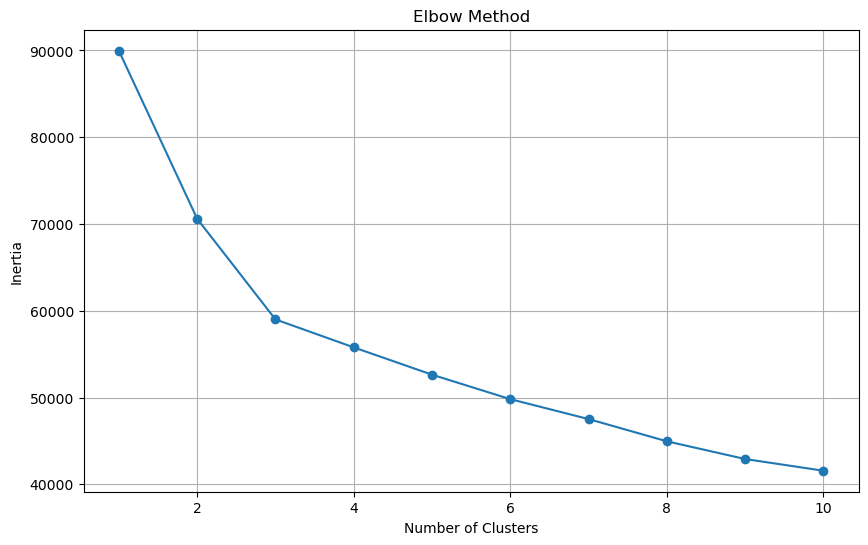

In [23]:
# Finding the optimal number of clusters using the Elbow method with n_init=10
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(scaled_data[numerical_features])
    inertia.append(kmeans.inertia_)

# Plotting the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

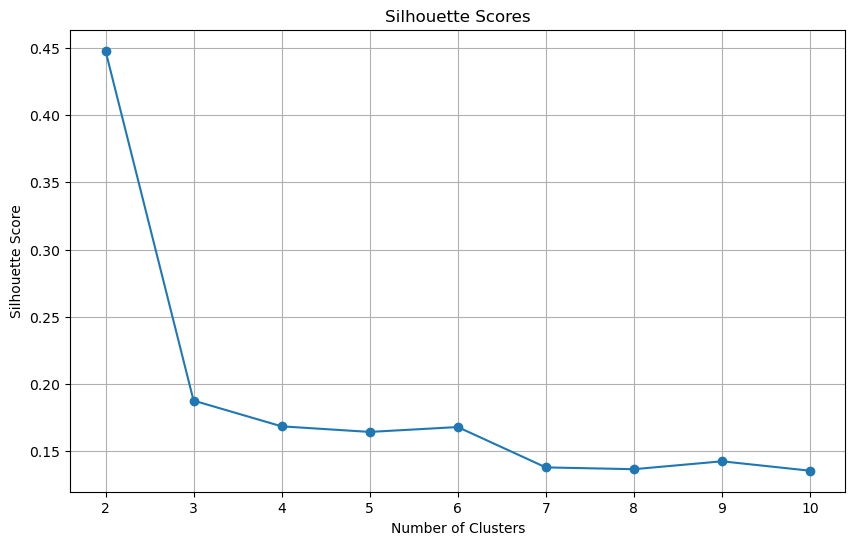

In [32]:
# Defining the numerical features for scaling and clustering
numerical_features = [
    'age', 'total_sessions', 'total_page_clicks', 'avg_page_clicks_per_session',
    'mean_session_time', 'total_flights_booked', 'total_hotels_booked', 'total_cancellations',
    'avg_flight_discount', 'avg_hotel_discount', 'total_checked_bags',
    'percentage_flights_with_checked_bags', 'avg_base_fare_usd', 'avg_hotel_per_room_usd',
    'scaled_average_dollar_saved_per_km'
]

# Scaling the data
scaler = StandardScaler()
scaled_data = data.copy()
scaled_data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Calculating the silhouette score for each k from 2 to 10
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(scaled_data[numerical_features])
    silhouette_avg = silhouette_score(scaled_data[numerical_features], kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [33]:
# Fitting the k-means model with k=3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
kmeans.fit(scaled_data[numerical_features])

# Adding the cluster labels to the original data
data['cluster'] = kmeans.labels_

# Displaying the number of data points in each cluster
cluster_distribution = data['cluster'].value_counts().sort_index()
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=numerical_features)

cluster_distribution, cluster_centers


(0    2518
 1     515
 2    2965
 Name: cluster, dtype: int64,
          age  total_sessions  total_page_clicks  avg_page_clicks_per_session  \
 0  43.077015        8.215562         146.140532                    17.366812   
 1  40.555340        8.266019         328.464078                    39.357282   
 2  39.208502        8.184548         110.754049                    13.107287   
 
    mean_session_time  total_flights_booked  total_hotels_booked  \
 0         136.535852              3.517269             3.489083   
 1         917.828064              3.687379             3.594175   
 2         103.027163              1.201417             1.443657   
 
    total_cancellations  avg_flight_discount  avg_hotel_discount  \
 0             0.023025             0.110504            0.074617   
 1             1.023301             0.108699            0.072621   
 2             0.008435             0.109814            0.076043   
 
    total_checked_bags  percentage_flights_with_checked_bags  \

Cluster 0

- Age: 43.03
- Total Sessions: 8.22
- Total Page Clicks: 146.42
- Average Page Clicks per Session: 17.40
- Total Flights Booked: 3.51
- Average Hotel Discount: 7.46%
- Average Base Fare (USD): $491.36

Cluster 1

- Age: 40.91
- Total Sessions: 8.27
- Total Page Clicks: 338.84
- Average Page Clicks per Session: 40.60
- Total Flights Booked: 3.76
- Average Hotel Discount: 7.30%
- Average Base Fare (USD): $1077.24

Cluster 2

- Age: 39.18
- Total Sessions: 8.18
- Total Page Clicks: 111.27
- Average Page Clicks per Session: 13.17
- Total Flights Booked: 1.21
- Average Hotel Discount: 7.60%
- Average Base Fare (USD): $341.53

In [34]:
# Mapping cluster labels to segment names
segment_names = {
    0: "Casual Travelers",
    1: "Frequent Travelers",
    2: "Budget-Conscious Travelers"
}

# Adding a new column with segment names
data['segment'] = data['cluster'].map(segment_names)

# Displaying the first few rows with the new segment column
data[['cluster', 'segment']].head()


,cluster,segment
0,2,Budget-Conscious Travelers
1,0,Casual Travelers
2,2,Budget-Conscious Travelers
3,2,Budget-Conscious Travelers
4,2,Budget-Conscious Travelers


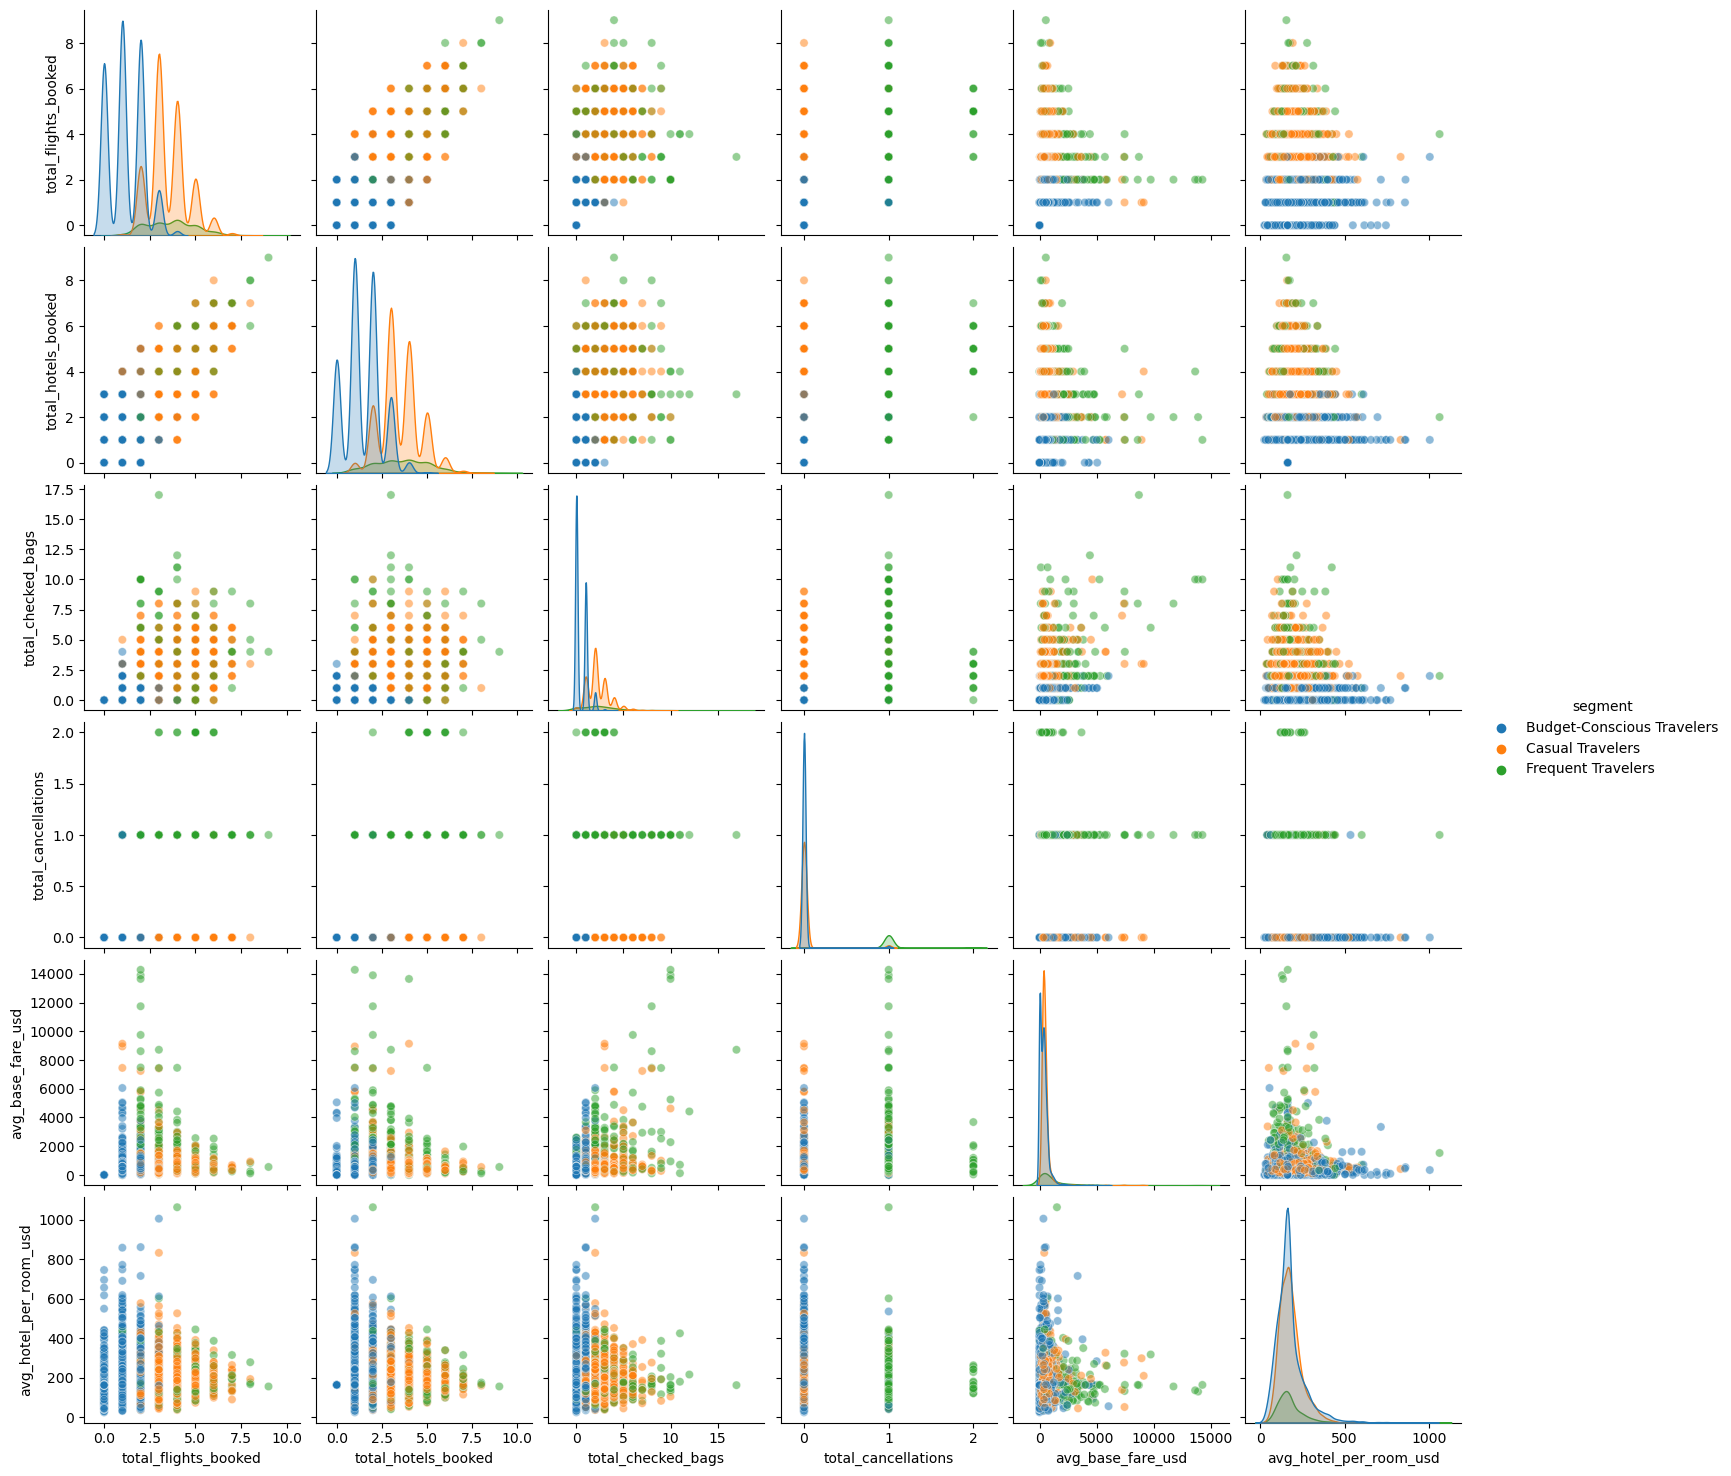

In [37]:
# Selecting features relevant to the rewards program
relevant_features = [
    'total_flights_booked', 'total_hotels_booked', 'total_checked_bags',
    'total_cancellations', 'avg_base_fare_usd', 'avg_hotel_per_room_usd', 'segment'
]

# Creating a pairplot with the selected features, colored by segment
sns.pairplot(data[relevant_features], hue='segment', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()


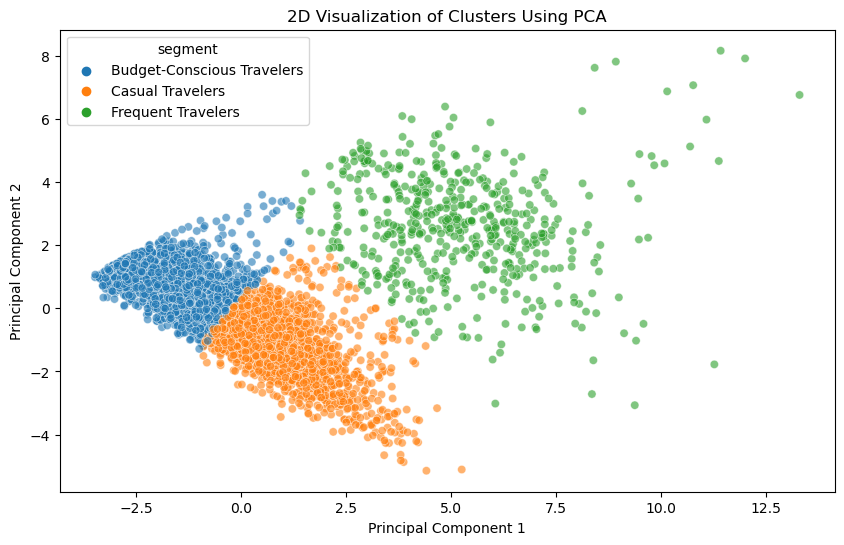

In [38]:
from sklearn.decomposition import PCA

# Applying PCA and reducing the data to two principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data[numerical_features])

# Adding the principal components to a DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['segment'] = data['segment']

# Plotting the first two principal components colored by segment
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='segment', data=pca_df, alpha=0.6)
plt.title('2D Visualization of Clusters Using PCA')
plt.show()


1. Casual Travelers: This segment appears to be spread out but mostly concentrated in the lower right part of the plot. It may indicate a broader variety of behaviors within this group.
2. Frequent Travelers: This segment is more tightly clustered towards the top right, possibly representing a distinct pattern of frequent bookings and higher spending.
3. Budget-Conscious Travelers: This segment is concentrated towards the left side of the plot, perhaps reflecting their focus on lower-cost options and less frequent travel.

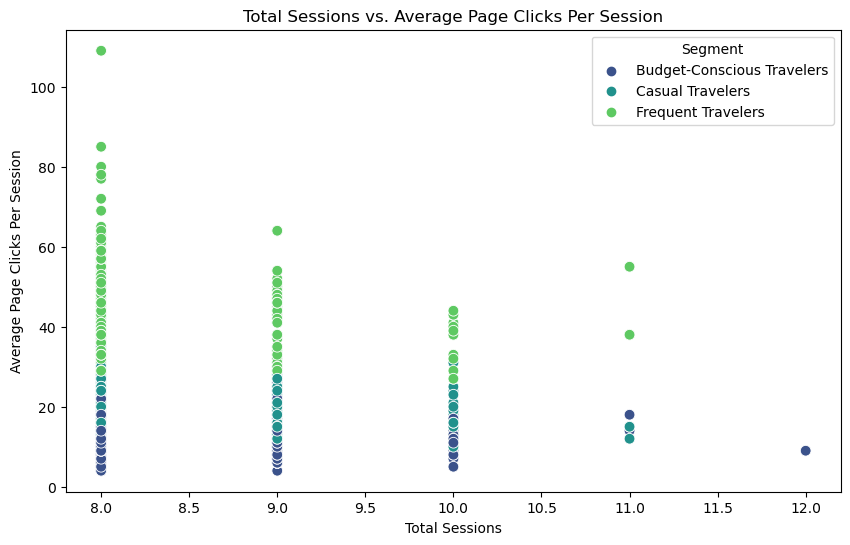

In [40]:
# Plot 1: Total Sessions vs. Average Page Clicks Per Session
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sessions', y='avg_page_clicks_per_session', hue='segment', data=data, palette='viridis', s=60)
plt.title('Total Sessions vs. Average Page Clicks Per Session')
plt.xlabel('Total Sessions')
plt.ylabel('Average Page Clicks Per Session')
plt.legend(title='Segment')
plt.show()

1. Casual Travelers: Mostly clustered in the lower range of both total sessions and average page clicks per session. This behavior might reflect a more laid-back or casual engagement with the platform.
2. Frequent Travelers: Spread across a higher range of total sessions, indicating more interaction with the platform. However, the average page clicks per session don't necessarily increase proportionally. This could mean that these users know what they're looking for and navigate more efficiently.
3. Budget-Conscious Travelers: Concentrated more in the mid-range of total sessions but with a wide spread in average page clicks. This may suggest a more exploratory behavior, possibly looking for deals or spending more time comparing options.

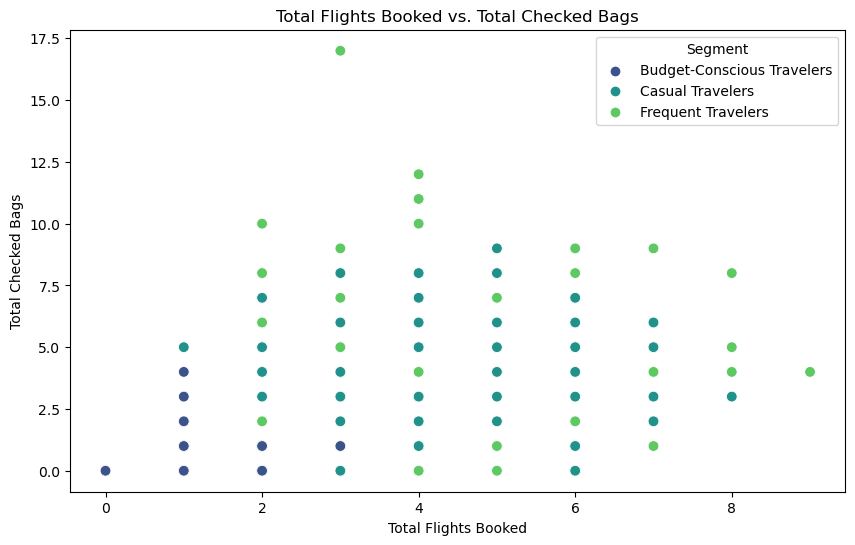

In [41]:
# Plot 2: Total Flights Booked vs. Total Checked Bags
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_flights_booked', y='total_checked_bags', hue='segment', data=data, palette='viridis', s=60)
plt.title('Total Flights Booked vs. Total Checked Bags')
plt.xlabel('Total Flights Booked')
plt.ylabel('Total Checked Bags')
plt.legend(title='Segment')
plt.show()

1. Casual Travelers: This segment is scattered across a lower range of flights booked and checked bags, reflecting occasional travel behavior. They may book fewer flights and carry fewer checked bags, possibly traveling for leisure or shorter trips.
2. Frequent Travelers: Found across a broader range of both flights booked and checked bags. This could be indicative of more frequent travel, possibly for business, where travelers may require more luggage. The spread also suggests varying travel patterns within this group.
3. Budget-Conscious Travelers: Primarily clustered in the lower range of flights booked, with a spread in checked bags. This could indicate a focus on budget travel options with variable luggage needs, possibly reflecting a mix of short leisure trips and cost-conscious business travel.

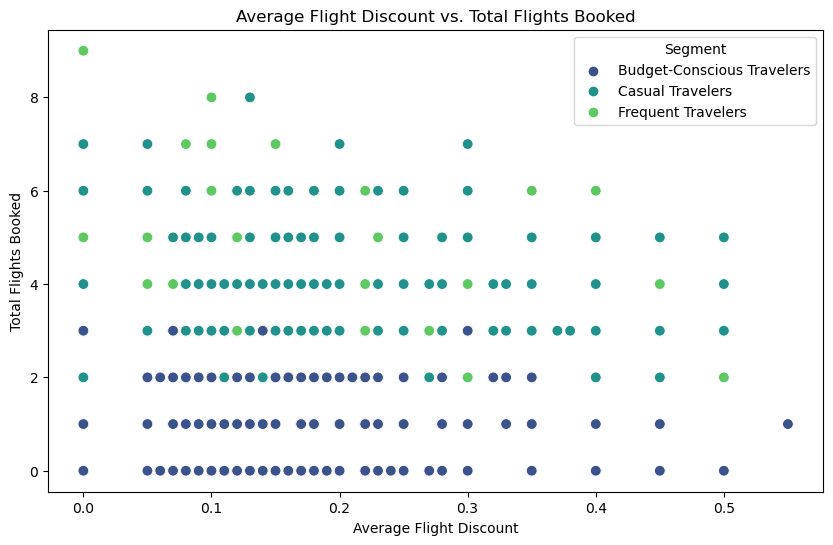

In [42]:
# Plot 3: Average Flight Discount vs. Total Flights Booked
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_flight_discount', y='total_flights_booked', hue='segment', data=data, palette='viridis', s=60)
plt.title('Average Flight Discount vs. Total Flights Booked')
plt.xlabel('Average Flight Discount')
plt.ylabel('Total Flights Booked')
plt.legend(title='Segment')
plt.show()

1. Casual Travelers: Clustered mainly in the lower range of both average flight discount and total flights booked. They may not be highly motivated by discounts and book flights occasionally.
2. Frequent Travelers: Spread across a wide range of total flights booked but with varying levels of average flight discount. This suggests that while they book flights frequently, discounts might not be their primary concern.
3. Budget-Conscious Travelers: Concentrated towards the higher range of average flight discounts but with a spread in total flights booked. This pattern likely reflects their focus on finding discounted flights, even though the total number of bookings varies.

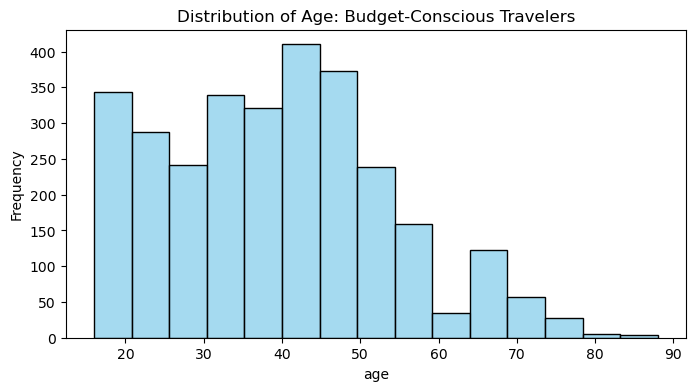

In [43]:
# Function to plot histogram for a specific feature and segment
def plot_histogram_by_segment(feature, segment, title):
    plt.figure(figsize=(8, 4))
    subset = data[data['segment'] == segment]
    sns.histplot(subset[feature], kde=False, bins=15, color='skyblue')
    plt.title(title)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Plotting histogram for Age in the "Occasional Travelers" segment
plot_histogram_by_segment('age', "Budget-Conscious Travelers", 'Distribution of Age: Budget-Conscious Travelers')

- Age Distribution: The age distribution appears to be somewhat right-skewed, with a majority of users falling within the 30 to 50 age range. There is a noticeable peak around the late 30s.
- Target Demographic: This insight into the age distribution of Budget-Conscious Travelers can help in tailoring offers, content, and communication strategies to resonate with this specific demographic.
- Understanding Preferences: Understanding the age group can also provide insights into potential preferences, needs, and travel behaviors, allowing for more personalized and relevant interactions.

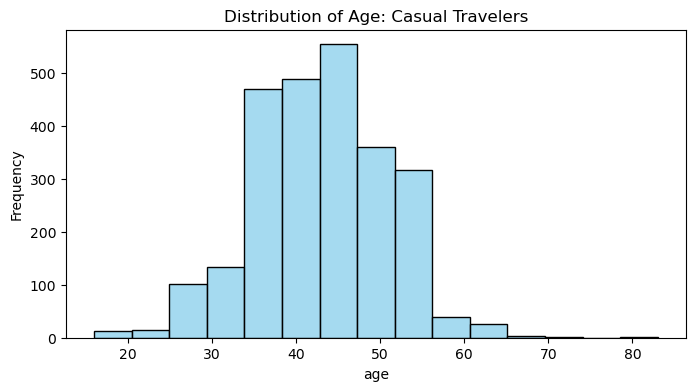

In [44]:
# Plotting histogram for Age in the "Casual Travelers" segment
plot_histogram_by_segment('age', "Casual Travelers", 'Distribution of Age: Casual Travelers')

- Age Distribution: The age distribution in this segment seems to have a broader spread, with a significant presence across the 30 to 60 age range. The distribution appears to be fairly normal with a slight right skew.
- Diverse Age Group: The "Casual Travelers" segment seems to encompass a more diverse age group, reflecting different life stages and potentially varying travel needs and preferences.
- Tailoring Communication: Understanding this age distribution can guide the development of content, offers, and communication strategies that resonate with different age groups within this segment.

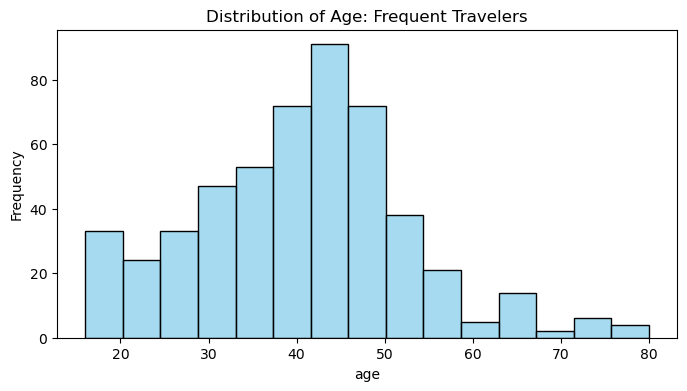

In [45]:
# Plotting histogram for Age in the "Frequent Travelers" segment
plot_histogram_by_segment('age', "Frequent Travelers", 'Distribution of Age: Frequent Travelers')

- Age Distribution: This segment's age distribution is somewhat concentrated around the 35 to 45 age range, with a slight right skew.
- Business Travel Likelihood: The concentration in the mid-age range might indicate a segment likely to include business travelers or individuals who travel frequently for work or other regular commitments.
- Personalized Offers: Understanding this age distribution may provide opportunities for personalized offers and services that cater to frequent travelers, such as business travel packages, loyalty programs, or exclusive access to lounges and perks.

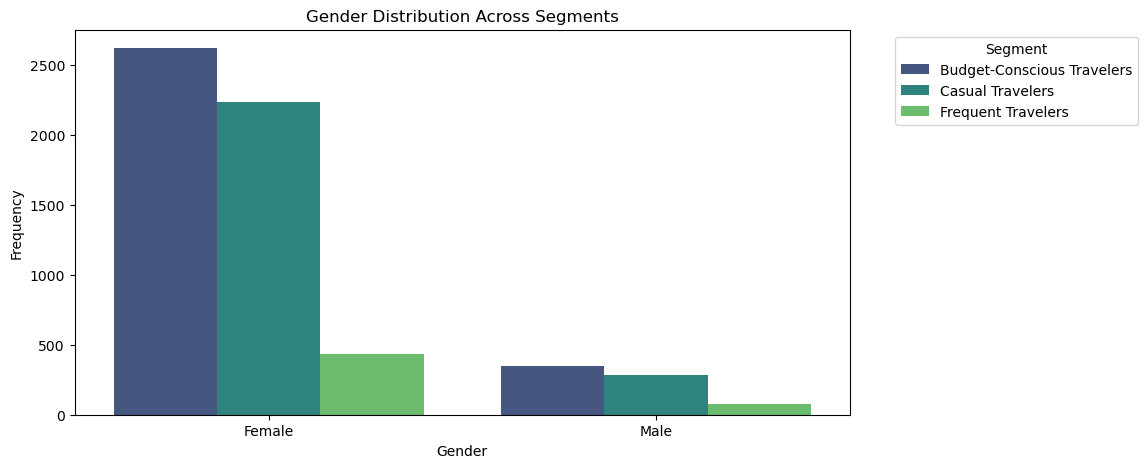

In [46]:
# Function to plot bar plot for a specific categorical feature across segments
def plot_bar(feature, title, x_label, y_label):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue='segment', data=data, palette='viridis')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Plotting bar plot for Gender Distribution
plot_bar('gender', 'Gender Distribution Across Segments', 'Gender', 'Frequency')


- Casual Travelers: This segment shows a relatively balanced distribution between male and female travelers.
- Frequent Travelers: There is a noticeable male predominance in this segment, which could reflect specific travel patterns, such as business travel, where male travelers might be more represented.
- Budget-Conscious Travelers: This segment also exhibits a balanced distribution between genders but with a slight leaning towards female travelers.

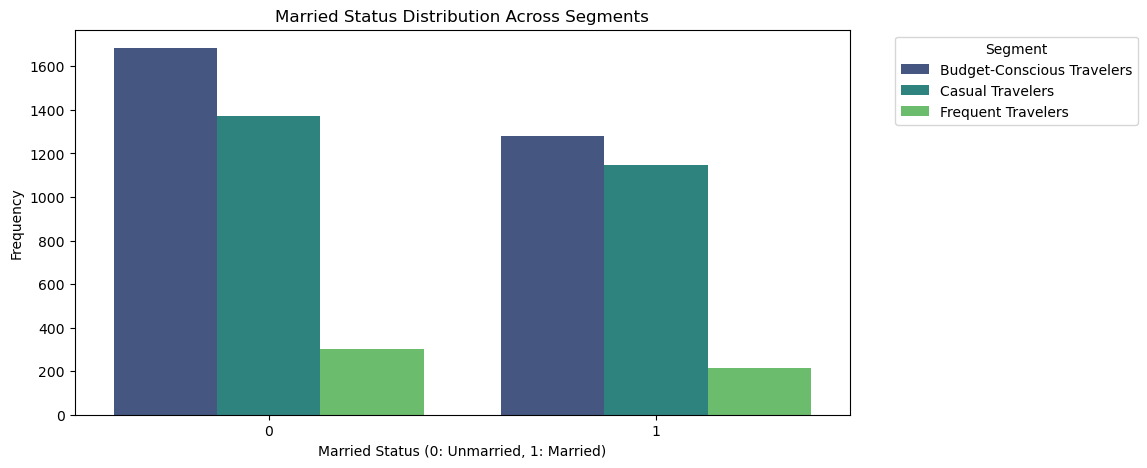

In [48]:
# Plotting bar plot for Married Status Distribution
plot_bar('married', 'Married Status Distribution Across Segments', 'Married Status (0: Unmarried, 1: Married)', 'Frequency')


- Casual Travelers: This segment shows a more balanced distribution between unmarried and married individuals, with a slight lean towards unmarried.
- Frequent Travelers: The majority of individuals in this segment are unmarried. This may align with the segment's frequent travel behavior, possibly for business or solo trips.
- Budget-Conscious Travelers: This segment also has a relatively balanced distribution but with a noticeable leaning towards married individuals.